In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import torch
from PIL import Image
import json
import pandas as pd 
import seaborn as sns
import torchvision.datasets as dset
from collections import Counter

import plotly.graph_objects as go

In [37]:
with open('/home/vietlq4/Downloads/CUFED_split/event_type.json') as f:
    data = json.load(f)

In [38]:
data['1_89803116@N00']

['Birthday']

In [39]:
df = pd.DataFrame(data.values(), data.keys())

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.index.values, df[0].values,
                                                    stratify= df[0].values, 
                                                    test_size=0.2)

In [46]:
X_test[:30]

array(['95_81227945@N00', '1_34336845@N07', '43_90949166@N00',
       '1_93372608@N00', '28_34589965@N00', '0_19086371@N00',
       '4_99275942@N00', '7_8865243@N02', '17_61048090@N00',
       '6_16247577@N00', '15_58600460@N05', '38_27988337@N00',
       '14_8388689@N03', '5_63633763@N00', '37_20881138@N00',
       '36_33917831@N00', '8_71486434@N00', '172_7702423@N04',
       '38_7614607@N05', '2_47693154@N05', '8_37996586296@N01',
       '46_93452909@N00', '1_30705804@N05', '57_48681045@N00',
       '2_30275727@N02', '1_90427028@N00', '1_43811561@N00',
       '8_45919548@N00', '8_79034573@N00', '15_7494202@N06'], dtype=object)

In [5]:
df_train = df[(df[0].isna() != True ) & (df[1].isna()== True) & (df[2].isna()==True)]

In [6]:
df_single = df_train[0]

In [7]:
df_single = df_single[df_single != 'PersonalMusicActivity']

In [8]:
len(df_single.values)

1519

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_single.index.values, df_single.values,
                                                    stratify= df_single.values, 
                                                    test_size=0.2)

In [ ]:
np.savetxt('train_new.txt', X_train.tolist(), fmt='%s', newline='\n')
np.savetxt('test_new.txt', X_test.tolist(), fmt='%s', newline='\n')


In [10]:
np.unique(y_test, return_counts=True)

(array(['Architecture', 'BeachTrip', 'Birthday', 'BusinessActivity',
        'CasualFamilyGather', 'Christmas', 'Cruise', 'Graduation',
        'GroupActivity', 'Halloween', 'Museum', 'NatureTrip',
        'PersonalArtActivity', 'PersonalSports', 'Protest',
        'ReligiousActivity', 'Show', 'Sports', 'ThemePark', 'UrbanTrip',
        'Wedding', 'Zoo'], dtype=object),
 array([ 5,  7, 32,  9,  4, 19,  9, 35,  5, 18,  8,  6,  6,  6,  9,  7, 19,
         9, 18, 17, 38, 18]))

In [11]:
source = df_train[0].value_counts()
source

Wedding                  191
Graduation               172
Birthday                 160
Show                      94
Christmas                 94
Halloween                 92
Zoo                       90
ThemePark                 89
UrbanTrip                 86
BusinessActivity          47
Protest                   47
Cruise                    45
Sports                    43
Museum                    38
ReligiousActivity         37
BeachTrip                 35
PersonalSports            30
NatureTrip                30
PersonalArtActivity       29
GroupActivity             26
Architecture              25
CasualFamilyGather        19
PersonalMusicActivity      1
Name: 0, dtype: int64

In [12]:
source = pd.Series(y_train).value_counts()
source

Wedding                153
Graduation             137
Birthday               128
Show                    75
Christmas               75
Halloween               74
Zoo                     72
ThemePark               71
UrbanTrip               69
Protest                 38
BusinessActivity        38
Cruise                  36
Sports                  34
Museum                  30
ReligiousActivity       30
BeachTrip               28
NatureTrip              24
PersonalSports          24
PersonalArtActivity     23
GroupActivity           21
Architecture            20
CasualFamilyGather      15
dtype: int64

In [2]:
import numpy as np
import math

# labels_dict : {ind_label: count_label}
# mu : parameter to tune 

def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight

# random labels_dict
labels_dict = {'Wedding': 153,
'Graduation         ':    137,
'Birthday           ':    128,
'Show               ':     75,
'Christmas          ':     75,
'Halloween          ':     74,
'Zoo                ':     72,
'ThemePark          ':     71,
'UrbanTrip          ':     69,
'Protest            ':     38,
'BusinessActivity   ':     38,
'Cruise             ':     36,
'Sports             ':     34,
'Museum             ':     30,
'ReligiousActivity  ':     30,
'BeachTrip          ':     28,
'NatureTrip         ':     24,
'PersonalSports     ':     24,
'PersonalArtActivity':     23,
'GroupActivity      ':     21,
'Architecture       ':     20,
'CasualFamilyGather ':     15}

create_class_weight(labels_dict)

{'Wedding': 1.0,
 'Graduation         ': 1.0,
 'Birthday           ': 1.0,
 'Show               ': 1.0,
 'Christmas          ': 1.0,
 'Halloween          ': 1.0,
 'Zoo                ': 1.0,
 'ThemePark          ': 1.0,
 'UrbanTrip          ': 1.0,
 'Protest            ': 1.5677932111623818,
 'BusinessActivity   ': 1.5677932111623818,
 'Cruise             ': 1.6218604324326575,
 'Sports             ': 1.6790188462726061,
 'Museum             ': 1.8041819892266122,
 'ReligiousActivity  ': 1.8041819892266122,
 'BeachTrip          ': 1.8731748607135636,
 'NatureTrip         ': 2.0273255405408217,
 'PersonalSports     ': 2.0273255405408217,
 'PersonalArtActivity': 2.069885154959618,
 'GroupActivity      ': 2.1608569331653444,
 'Architecture       ': 2.2096470973347766,
 'CasualFamilyGather ': 2.4973291697865574}

In [ ]:
[2.21, 1.873, 1, 1.567,
                  2.497, 1, 1.622, 1, 2.161,
                  1, 1.804, 2.027, 2.069,
                  2.069, 2.027, 1.567, 1.804,
                  1 , 1.679, 1 , 1, 1, 1]

In [13]:
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Label distribution')
fig.show()


In [30]:
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Label distribution')
fig.show()

In [14]:
df_multi = df[(df[0].isna() != True ) & (df[1].isna() != True)]

In [15]:
df_multi =df_multi[[0,1]]


In [35]:
df_multi.to_csv('multi.csv')


In [17]:
from sklearn.model_selection import train_test_split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(df_multi.index.values, df_multi.values, 
                                                    test_size=0.2)

In [32]:
np.savetxt('multi.txt', X_train_multi.tolist() + X_test_multi.tolist(), fmt='%s', newline='\n')

In [22]:
test = X_test.tolist() + X_test_multi.tolist()

In [36]:
len(X_test_multi)

73

In [25]:
test

['211_28004289@N03',
 '20_80081080@N00',
 '0_23451880@N04',
 '18_9532859@N02',
 '7_57686217@N02',
 '0_49502979298@N01',
 '1_80547277@N00',
 '19_36686551@N06',
 '14_13731663@N08',
 '0_48987853@N00',
 '13_77888804@N00',
 '56_87807876@N00',
 '2_85724483@N00',
 '9_59248878@N00',
 '15_54494252@N00',
 '53_44124466908@N01',
 '9_33389995@N08',
 '14_55254782@N00',
 '2_96212491@N00',
 '0_73029069@N00',
 '0_21757951@N00',
 '7_41284017@N08',
 '78_40094880@N06',
 '4_40246574@N04',
 '2_97281671@N00',
 '0_53826674@N05',
 '0_54766648@N00',
 '1_28004076@N04',
 '17_10175970@N00',
 '4_59888866@N00',
 '20_46971098@N00',
 '9_49503114554@N01',
 '2_25425455@N04',
 '0_9137715@N05',
 '3_61368956@N00',
 '14_81788993@N00',
 '28_69001323@N00',
 '59_70318325@N00',
 '3_64834167@N00',
 '11_28817993@N00',
 '0_49745694@N00',
 '0_34334923@N08',
 '2_15296966@N00',
 '0_45695345@N00',
 '21_99706198@N00',
 '6_63216127@N04',
 '9_79891443@N00',
 '19_63262340@N00',
 '10_28815288@N06',
 '135_22489773@N02',
 '1_74135127@N00',
 

In [82]:
train = X_train.tolist()

In [83]:
np.savetxt('train.txt', train, fmt='%s', newline='\n')

In [59]:
source = pd.Series(y_train_multi).value_counts()
source
# fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
# fig.update_layout(title='Label distribution')
# fig.show()

ValueError: Data must be 1-dimensional

In [130]:
np.savetxt('test.txt', test, fmt='%s', newline='\n')

In [87]:
df

,0,1,2
1_89803116@N00,Birthday,None,None
189_71606984@N00,GroupActivity,CasualFamilyGather,None
16_74628614@N00,Halloween,None,None
4_65768710@N00,Cruise,None,None
26_93382693@N00,Graduation,None,None
...,...,...,...
2_25425455@N04,Graduation,None,None
108_84806883@N00,Halloween,None,None
17_20278037@N00,Christmas,None,None
46_35034360223@N01,GroupActivity,None,None


In [118]:
df.describe()

,0,1,2
count,1520,0,0
unique,23,0,0
top,Wedding,NaN,NaN
freq,191,NaN,NaN


In [109]:
df[df[0] == 'PersonalMusicActivity']

,0,1,2
9_68986342@N00,PersonalMusicActivity,None,None


In [110]:
df = df[df[0] != 'PersonalMusicActivity']

In [111]:
df.describe()

,0,1,2
count,1519,0,0
unique,22,0,0
top,Wedding,NaN,NaN
freq,191,NaN,NaN


In [112]:
# val = df.groupby(0).apply(lambda s: s.sample(6)).index.tolist()
val = df.groupby(0).apply(lambda s: s.sample(5)).index.tolist()

In [134]:
val = np.loadtxt('val.txt',dtype='str',delimiter='\n')

In [138]:
print(val)

['0_75875954@N00' '0_9154295@N04' '4_54781523@N00' '9_21117297@N00'
 '7_53834128@N06' '4_81487723@N00' '40_52725445@N00' '2_77784942@N00'
 '4_40246574@N04' '96_25414369@N00' '17_95601478@N00' '21_82526175@N00'
 '11_28817993@N00' '5_37588808@N00' '3_16976034@N00' '3_27859631@N04'
 '1_53363419@N00' '1_50964933@N08' '13_23654380@N00' '1_16289690@N00'
 '11_76701708@N00' '2_54084941@N00' '20_52736950@N00' '56_87807876@N00'
 '92_43162195@N00' '18_14966804@N03' '83_13122632@N00' '14_53746192@N00'
 '6_44284754@N03' '1_45082883@N00' '13_77888804@N00' '6_10978503@N00'
 '4_99382980@N00' '22_17593639@N08' '5_94949785@N00' '0_68321476@N00'
 '7_28316081@N00' '0_91151414@N00' '26_93382693@N00' '0_92024390@N00'
 '3_48889087714@N01' '64_43682941@N00' '49_92248347@N00'
 '110_28004289@N03' '0_7706183@N06' '7_26216388@N02' '0_69468712@N00'
 '12_97551727@N00' '116_71453924@N00' '0_40958113@N00' '236_7702423@N04'
 '15_59809888@N06' '9_44718928@N00' '29_51035749109@N01' '8_98153629@N00'
 '72_25483059@N08' '0

In [119]:
train = df.index.tolist()

In [121]:
len(train)

1520

In [122]:
np.savetxt('train.txt',train,fmt='%s', newline='\n')

In [7]:
df[0].value_counts()

Wedding                  195
Birthday                 183
Graduation               176
Show                     126
UrbanTrip                117
Zoo                      109
Halloween                106
Christmas                103
ThemePark                 99
PersonalSports            75
Sports                    72
Cruise                    52
BusinessActivity          51
Museum                    50
NatureTrip                49
Protest                   49
ReligiousActivity         48
BeachTrip                 46
GroupActivity             45
Architecture              41
CasualFamilyGather        40
PersonalArtActivity       40
PersonalMusicActivity     11
Name: 0, dtype: int64

In [5]:
df.describe()

,0,1,2
count,1883,363,4
unique,23,23,4
top,Wedding,GroupActivity,PersonalSports
freq,195,42,1


In [78]:
df_3_labels = df[(df[0].isna() != True ) & (df[1].isna()!= True) & (df[2].isna()!=True)]

In [79]:
df_3_labels

,0,1,2
61_33988590@N00,Show,GroupActivity,PersonalSports
1_26046068@N04,Birthday,CasualFamilyGather,GroupActivity
1_8579740@N02,GroupActivity,Halloween,PersonalArtActivity
14_97402086@N00,UrbanTrip,Museum,Architecture


In [89]:
df_2_labels = df[(df[0].isna() != True ) & (df[1].isna()!= True)][[0,1]].sort_values(by=[0,1])

In [115]:
df_2_labels.head()

,0,1
72_22539273@N00,Architecture,Museum
25_69875617@N00,Architecture,NatureTrip
0_30214240@N02,Architecture,PersonalArtActivity
23_17643132@N00,Architecture,ReligiousActivity
1_9490254@N06,Architecture,Show


In [90]:
list_2_labels = df_2_labels.values.tolist()

In [106]:
confuse = Counter([tuple(i) for i in list_2_labels])

In [111]:
Output = pd.DataFrame(data ={'list': list(confuse.keys()),
                         'count': list(confuse.values())}).sort_values(by='count',ascending=False)

In [113]:
Output.head(20)

,list,count
75,"(PersonalSports, Sports)",39
99,"(Sports, PersonalSports)",29
108,"(UrbanTrip, Architecture)",16
122,"(Zoo, NatureTrip)",14
12,"(Birthday, CasualFamilyGather)",13
93,"(Show, PersonalMusicActivity)",12
50,"(Halloween, GroupActivity)",11
5,"(Architecture, UrbanTrip)",11
69,"(PersonalMusicActivity, Show)",10
24,"(CasualFamilyGather, GroupActivity)",9


In [23]:
df[0].value_counts()

Wedding                  195
Birthday                 183
Graduation               176
Show                     126
UrbanTrip                117
Zoo                      109
Halloween                106
Christmas                103
ThemePark                 99
PersonalSports            75
Sports                    72
Cruise                    52
BusinessActivity          51
Museum                    50
NatureTrip                49
Protest                   49
ReligiousActivity         48
BeachTrip                 46
GroupActivity             45
Architecture              41
CasualFamilyGather        40
PersonalArtActivity       40
PersonalMusicActivity     11
Name: 0, dtype: int64

<AxesSubplot:ylabel='0'>

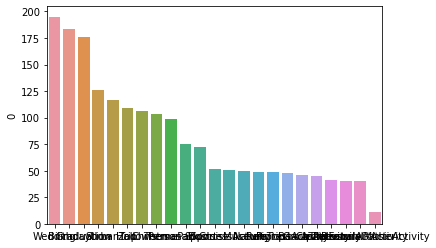

In [114]:
sns.barplot(x=df[0].value_counts().index, y=df[0].value_counts())

In [118]:
folder_dataset = dset.ImageFolder(root='/vinai/vietlq4/dataset/CUFED/images')

In [119]:
folder_dataset

Dataset ImageFolder
    Number of datapoints: 94797
    Root location: /vinai/vietlq4/dataset/CUFED/images

In [122]:
folder_dataset.imgs[-1]

('/vinai/vietlq4/dataset/CUFED/images/9_97734635@N00/497319001.jpg', 1882)

In [4]:
import torch
x = torch.tensor([1, 0, 0])
x.repeat(4, 1)

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]])

In [80]:
from random import choices

items = range(0, 31)
new_items = choices(items, k = 32)

print(new_items) 

[17, 6, 3, 21, 21, 23, 9, 28, 13, 23, 22, 23, 4, 14, 25, 22, 6, 2, 26, 6, 28, 15, 23, 0, 24, 24, 11, 2, 5, 25, 6, 21]


In [7]:
import shutil
import os
import numpy as np

cur_dir = '/home/vietlq4/Downloads/CUFED/images' # current dir path

LL = np.loadtxt('/home/vietlq4/thesis/filenames/test.txt', dtype='str', delimiter='\n')

list_dir = os.listdir(cur_dir)
dest = os.path.join(cur_dir,'test') 

for sub_dir in list_dir:
    if sub_dir in LL:
        dir_to_move = os.path.join(cur_dir, sub_dir)
        shutil.move(dir_to_move, dest)